DATASET: [datos abiertos anemia](https://www.datosabiertos.gob.pe/dataset/morbilidad-anemia)

In [2]:
!pip install pyjanitor==0.28.1
import janitor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df_anemia = pd.read_csv('/content/TB_ANEMIA.csv',sep = ";")
df_anemia.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,36178991,6,M,F,NaN,20210524,D509,D,2137
1,38986407,2,A,M,1128.0,20211118,D509,D,10836
2,39002414,1,A,F,1128.0,20210417,D509,D,10836
3,39002414,1,A,F,1128.0,20210413,D509,D,10836
4,39002414,3,A,F,1128.0,20220612,D509,D,10836
5,40663149,3,A,F,1542.0,20230613,D509,D,1030
6,39390036,1,A,F,1128.0,20210118,D509,D,10836
7,39390036,1,A,F,1128.0,20210123,D509,D,10836
8,39390036,1,A,F,1128.0,20210518,D509,D,10836
9,39390036,2,A,F,1128.0,20220116,D509,D,10836


In [5]:
df_ubigeos = pd.read_csv('/content/TB_UBIGEOS.csv',sep = ";")
df_ubigeos.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
id_ubigeo,int64
ubigeo_reniec,float64
ubigeo_inei,int64
departamento_inei,int64
departamento,object
provincia_inei,int64
provincia,object
distrito,object
region,object
macroregion_inei,object


In [6]:
df_anemia_ubigeo = df_ubigeos[['id_ubigeo','departamento']]
df_anemia_ubigeo.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id_ubigeo,departamento
0,1,AMAZONAS
1,2,AMAZONAS
2,3,AMAZONAS
3,4,AMAZONAS
4,5,AMAZONAS


# EDA

In [7]:
df_anemia.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1327924, 9)

In [8]:
df_anemia.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
id_persona,0
Edad,0
Tipo_edad,0
Sexo,0
id_ubigeo,10817
Fecha_atencion,0
Diagnostico,0
Tipo_Dx,0
id_eess,0


In [9]:
df_anemia.drop(['id_persona'],axis=1,inplace=True)
df_anemia.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,6,M,F,NaN,20210524,D509,D,2137
1,2,A,M,1128.0,20211118,D509,D,10836
2,1,A,F,1128.0,20210417,D509,D,10836
3,1,A,F,1128.0,20210413,D509,D,10836
4,3,A,F,1128.0,20220612,D509,D,10836
5,3,A,F,1542.0,20230613,D509,D,1030
6,1,A,F,1128.0,20210118,D509,D,10836
7,1,A,F,1128.0,20210123,D509,D,10836
8,1,A,F,1128.0,20210518,D509,D,10836
9,2,A,F,1128.0,20220116,D509,D,10836


# ELIMINAMOS LOS NULOS EN UBIGEO

In [10]:
df_anemia.dropna(subset=['id_ubigeo'],inplace=True)
df_anemia.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1317107, 8)

# CODIFICACION DE UBIGEO POR DPTO

In [11]:
df_anemia = df_anemia.merge(df_anemia_ubigeo,on='id_ubigeo',how='left')
df_anemia.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,departamento
0,2,A,M,1128.0,20211118,D509,D,10836,JUNIN
1,1,A,F,1128.0,20210417,D509,D,10836,JUNIN
2,1,A,F,1128.0,20210413,D509,D,10836,JUNIN
3,3,A,F,1128.0,20220612,D509,D,10836,JUNIN
4,3,A,F,1542.0,20230613,D509,D,1030,PASCO
5,1,A,F,1128.0,20210118,D509,D,10836,JUNIN
6,1,A,F,1128.0,20210123,D509,D,10836,JUNIN
7,1,A,F,1128.0,20210518,D509,D,10836,JUNIN
8,2,A,F,1128.0,20220116,D509,D,10836,JUNIN
9,3,A,F,1597.0,20210529,D509,D,2177,PIURA


In [ ]:
df_anemia.dtypes

,0
Edad,int64
Tipo_edad,object
Sexo,object
id_ubigeo,float64
Fecha_atencion,int64
Diagnostico,object
Tipo_Dx,object
id_eess,int64
departamento,object


In [ ]:
df_anemia.Tipo_edad.value_counts()

,count
Tipo_edad,
A,933646
M,382442
D,1019


In [12]:
df_anemia['edad_total'] = df_anemia.apply(
    lambda row:row['Edad'] /  12 if row['Tipo_edad'] =='M' else
    (row['Edad'] / 365 if row['Tipo_edad'] == "D" else row['Edad'])
    ,axis=1)
df_anemia.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,departamento,edad_total
0,2,A,M,1128.0,20211118,D509,D,10836,JUNIN,2.0
1,1,A,F,1128.0,20210417,D509,D,10836,JUNIN,1.0
2,1,A,F,1128.0,20210413,D509,D,10836,JUNIN,1.0
3,3,A,F,1128.0,20220612,D509,D,10836,JUNIN,3.0
4,3,A,F,1542.0,20230613,D509,D,1030,PASCO,3.0
5,1,A,F,1128.0,20210118,D509,D,10836,JUNIN,1.0
6,1,A,F,1128.0,20210123,D509,D,10836,JUNIN,1.0
7,1,A,F,1128.0,20210518,D509,D,10836,JUNIN,1.0
8,2,A,F,1128.0,20220116,D509,D,10836,JUNIN,2.0
9,3,A,F,1597.0,20210529,D509,D,2177,PIURA,3.0


In [ ]:
df_anemia.Tipo_Dx.value_counts()

,count
Tipo_Dx,
D,1317107


In [13]:
df_anemia.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Edad,int64
Tipo_edad,object
Sexo,object
id_ubigeo,float64
Fecha_atencion,int64
Diagnostico,object
Tipo_Dx,object
id_eess,int64
departamento,object
edad_total,float64


In [14]:
df_anemia.Diagnostico.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Diagnostico,
D509,1267210
D649,27499
D539,7149
D508,6028
D500,3275
D510,1115
D519,982
D648,602
D530,567


In [15]:
df_anemia['cie10'] = np.where(df_anemia['Diagnostico'].str.startswith(('D50','D53','D64')),1,0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_anemia.head()

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,departamento,edad_total,cie10
0,2,A,M,1128.0,20211118,D509,D,10836,JUNIN,2.0,1
1,1,A,F,1128.0,20210417,D509,D,10836,JUNIN,1.0,1
2,1,A,F,1128.0,20210413,D509,D,10836,JUNIN,1.0,1
3,3,A,F,1128.0,20220612,D509,D,10836,JUNIN,3.0,1
4,3,A,F,1542.0,20230613,D509,D,1030,PASCO,3.0,1


# CODIFICACION DE FECHA_ATENCION

In [16]:
df_anemia['Fecha_atencion'] = df_anemia['Fecha_atencion'].astype(str)
df_anemia['mes'] = df_anemia['Fecha_atencion'].str[4:6]
df_anemia.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,departamento,edad_total,cie10,mes
0,2,A,M,1128.0,20211118,D509,D,10836,JUNIN,2.0,1,11
1,1,A,F,1128.0,20210417,D509,D,10836,JUNIN,1.0,1,04
2,1,A,F,1128.0,20210413,D509,D,10836,JUNIN,1.0,1,04
3,3,A,F,1128.0,20220612,D509,D,10836,JUNIN,3.0,1,06
4,3,A,F,1542.0,20230613,D509,D,1030,PASCO,3.0,1,06
5,1,A,F,1128.0,20210118,D509,D,10836,JUNIN,1.0,1,01
6,1,A,F,1128.0,20210123,D509,D,10836,JUNIN,1.0,1,01
7,1,A,F,1128.0,20210518,D509,D,10836,JUNIN,1.0,1,05
8,2,A,F,1128.0,20220116,D509,D,10836,JUNIN,2.0,1,01
9,3,A,F,1597.0,20210529,D509,D,2177,PIURA,3.0,1,05


# CREAMOS DATAFRAME SOLO CON LOS DATOS PROCESADOS

In [17]:
df_anemia_processed = df_anemia[['mes','Sexo','departamento','edad_total','cie10']].copy()
df_anemia_processed.rename(columns={'Sexo':'sexo','departamento':'dpto','edad_total':'edad','cie10':'anemia'},inplace=True)
df_anemia_processed.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mes,sexo,dpto,edad,anemia
0,11,M,JUNIN,2.0,1
1,04,F,JUNIN,1.0,1
2,04,F,JUNIN,1.0,1
3,06,F,JUNIN,3.0,1
4,06,F,PASCO,3.0,1


In [18]:
df_anemia_processed.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
mes,object
sexo,object
dpto,object
edad,float64
anemia,int64


# CODIFICACION DE VARIABLES CATEGORICAS

In [35]:
df_anemia_processed.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mes,sexo,dpto,edad,anemia
0,11,M,JUNIN,2.0,1
1,04,F,JUNIN,1.0,1
2,04,F,JUNIN,1.0,1
3,06,F,JUNIN,3.0,1
4,06,F,PASCO,3.0,1


In [36]:
df_anemia_processed.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
mes,object
sexo,object
dpto,object
edad,float64
anemia,int64


# EJEMPLO DE ONEHOTENCODER PARA MES

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Crear una copia de DataFrame
df = df_anemia_processed.copy()

# Instanciar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # drop='first' para evitar colinealidad

# Aplicar el encoder a la columna categórica
encoded_data = encoder.fit_transform(df[['mes']])

# Convertir los resultados a un DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['mes']))

# Combinar con el DataFrame original
df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mes,sexo,dpto,edad,anemia,mes_01,mes_02,mes_03,mes_04,mes_05,mes_06,mes_07,mes_08,mes_09,mes_10,mes_11,mes_12
0,11,M,JUNIN,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,04,F,JUNIN,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,04,F,JUNIN,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,06,F,JUNIN,3.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,06,F,PASCO,3.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317102,08,F,LIMA,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1317103,03,M,LIMA,0.5,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317104,03,F,LIMA,11.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317105,04,F,LIMA,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# APLICANDO ONEHOTENCODER PARA TODAS LAS COLUMNAS CATEGORICAS

In [39]:
categorical_columns = df_anemia_processed.select_dtypes(object).columns
categorical_columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['mes', 'sexo', 'dpto'], dtype='object')

In [40]:

encoder = OneHotEncoder(sparse_output=False)  # 'drop="first"' para evitar colinealidad

categorical_cols = ['mes', 'sexo', 'dpto']

encoded_data = encoder.fit_transform(df_anemia_processed[categorical_columns])


encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))


df_anemia_encoded = pd.concat([df_anemia_processed.drop(columns=categorical_columns), encoded_df], axis=1)


df_anemia_encoded.head(2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edad,anemia,mes_01,mes_02,mes_03,mes_04,mes_05,mes_06,mes_07,mes_08,...,dpto_LORETO,dpto_MADRE DE DIOS,dpto_MOQUEGUA,dpto_PASCO,dpto_PIURA,dpto_PUNO,dpto_SAN MARTIN,dpto_TACNA,dpto_TUMBES,dpto_UCAYALI
0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_anemia_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317107 entries, 0 to 1317106
Data columns (total 41 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   edad                1317107 non-null  float64
 1   anemia              1317107 non-null  int64  
 2   mes_01              1317107 non-null  float64
 3   mes_02              1317107 non-null  float64
 4   mes_03              1317107 non-null  float64
 5   mes_04              1317107 non-null  float64
 6   mes_05              1317107 non-null  float64
 7   mes_06              1317107 non-null  float64
 8   mes_07              1317107 non-null  float64
 9   mes_08              1317107 non-null  float64
 10  mes_09              1317107 non-null  float64
 11  mes_10              1317107 non-null  float64
 12  mes_11              1317107 non-null  float64
 13  mes_12              1317107 non-null  float64
 14  sexo_F              1317107 non-null  float64
 15  sexo_M         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# ESCALABILIDAD DE VARIABLES

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_anemia_processed_scaled = scaler.fit_transform(df_anemia_encoded)
df_anemia_processed_scaled = pd.DataFrame(df_anemia_processed_scaled)
df_anemia_processed_scaled.columns = df_anemia_encoded.columns
df_anemia_processed_scaled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edad,anemia,mes_01,mes_02,mes_03,mes_04,mes_05,mes_06,mes_07,mes_08,...,dpto_LORETO,dpto_MADRE DE DIOS,dpto_MOQUEGUA,dpto_PASCO,dpto_PIURA,dpto_PUNO,dpto_SAN MARTIN,dpto_TACNA,dpto_TUMBES,dpto_UCAYALI
0,0.181614,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.090683,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.090683,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272546,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272546,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317102,0.090683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317103,0.045217,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317104,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317105,0.454410,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# CORRELACIONES

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

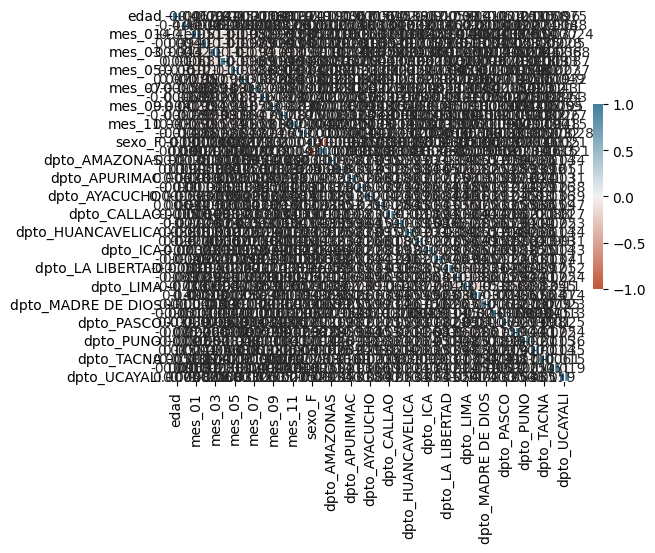

In [44]:
sns.heatmap(
    data=df_anemia_processed_scaled.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


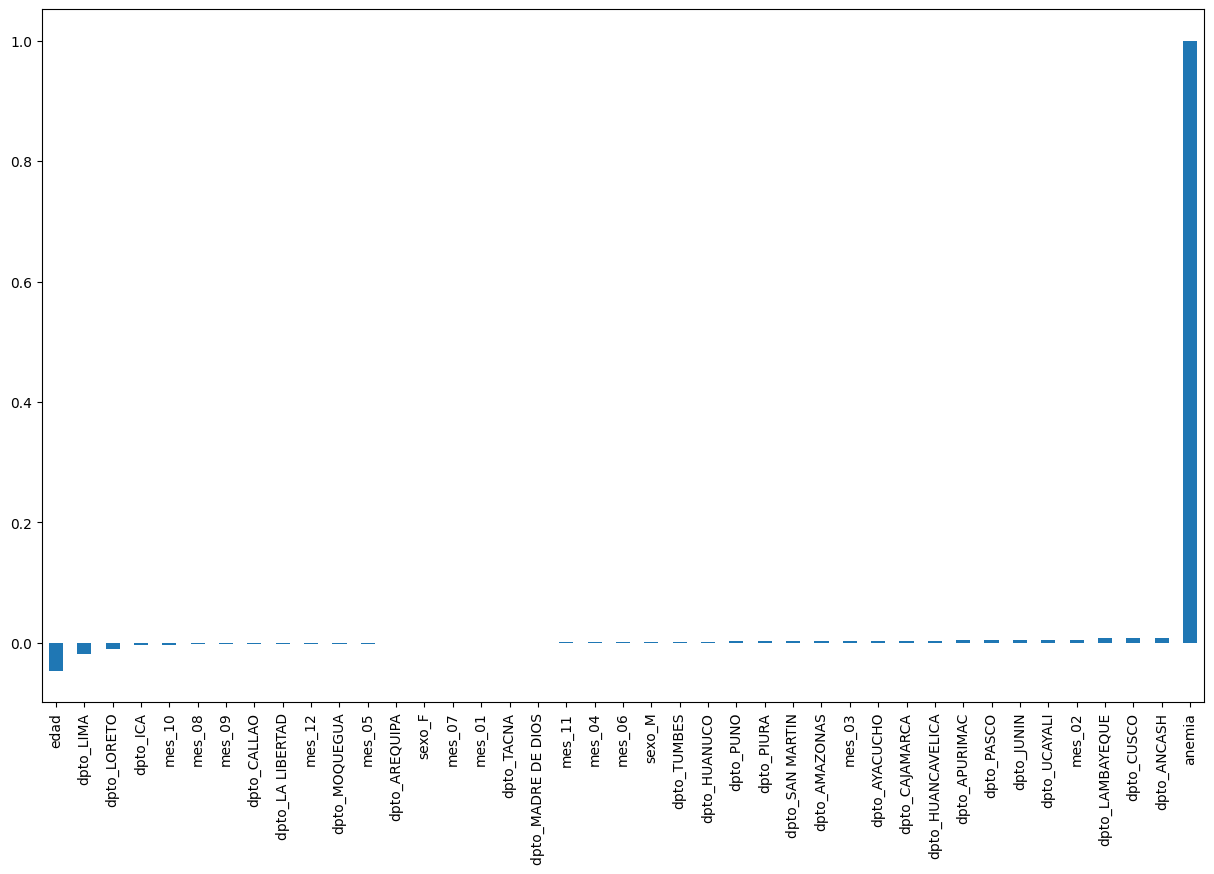

In [45]:
fig = plt.figure(figsize=(15,9))
df_anemia_processed_scaled.corr()['anemia'].sort_values(ascending=True).plot(kind='bar')
plt.show()

# REGRESION LINEAL MULTIPLE

## ENTRENAMIENTO DEL MODELO DE REGRESION LINEAL MULTIPLE

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_linear_regression = df_anemia_processed_scaled.copy()
X = df_linear_regression.drop(columns = ['anemia'])
y = df_linear_regression[['anemia']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train,y_train)

y_pred = model_linear_regression.predict(X_test)
y_pred.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(395133, 1)

## METRICAS DE MODELO DE REGRESION LINEAL MULTIPLE

In [50]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print(f" r2  : {r2}")
print(f" mse : {mse.round(4)}")

 r2  : 0.0029539954400984447
 mse : 0.0024


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## CONCLUSIÓN : MODELO NO SIRVE PARA ESTE DATASET

# REGRESIÓN LOGISTICA

## ENTRENAMOS EL MODELO

In [51]:
from sklearn.linear_model import LogisticRegression

df_logic_regression = df_anemia_processed_scaled.copy()
X = df_logic_regression.drop(columns = ['anemia'])
y = df_logic_regression[['anemia']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
model_logic = LogisticRegression()
model_logic.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## EVALUAMOS EL MODELO

In [53]:
y_pred = model_logic.predict(X_test)

logic_accuracy = metrics.accuracy_score(y_test,y_pred)
print(f'accuracy para Regresión logistica : {logic_accuracy}')

accuracy para Regresión logistica : 0.9977678401955797


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Axes(0.125,0.11;0.775x0.77)


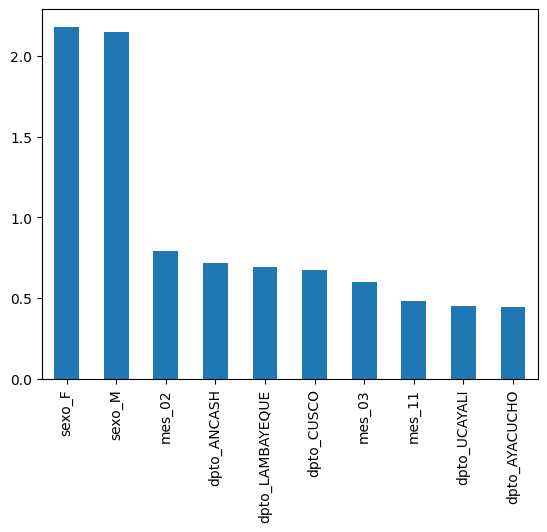

In [54]:
weights = pd.Series(model_logic.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

# ENTRENAMIENTO DE MODELO CON ARBOL DE DECISIÓN

In [55]:
df_anemia_processed_scaled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edad,anemia,mes_01,mes_02,mes_03,mes_04,mes_05,mes_06,mes_07,mes_08,...,dpto_LORETO,dpto_MADRE DE DIOS,dpto_MOQUEGUA,dpto_PASCO,dpto_PIURA,dpto_PUNO,dpto_SAN MARTIN,dpto_TACNA,dpto_TUMBES,dpto_UCAYALI
0,0.181614,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.090683,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.090683,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272546,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272546,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317102,0.090683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317103,0.045217,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317104,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317105,0.454410,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
X = df_anemia_processed_scaled.drop('anemia',axis=1)
y = df_anemia_processed_scaled.anemia
print(X)
print(y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


             edad  mes_01  mes_02  mes_03  mes_04  mes_05  mes_06  mes_07  \
0        0.181614     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.090683     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2        0.090683     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3        0.272546     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4        0.272546     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
1317102  0.090683     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1317103  0.045217     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
1317104  1.000000     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
1317105  0.454410     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
1317106  1.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

         mes_08  mes_09  ...  dpto_LORETO  dpto_MADRE DE DIOS  dpto_MOQUEGU

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state= 00000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5,random_state=00000)
tree.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(max_depth=5, random_state=0)

## EVALUAMOS MODELO DE ARBOL DE DECISIÓN

In [59]:
from sklearn.metrics import accuracy_score
y_test_pred = tree.predict(X_test)

test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'El acurracy para arbol de decisión es  : {test_accuracy}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


El acurracy para arbol de decisión es  : 0.997729878294144


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-cefa913c87bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)


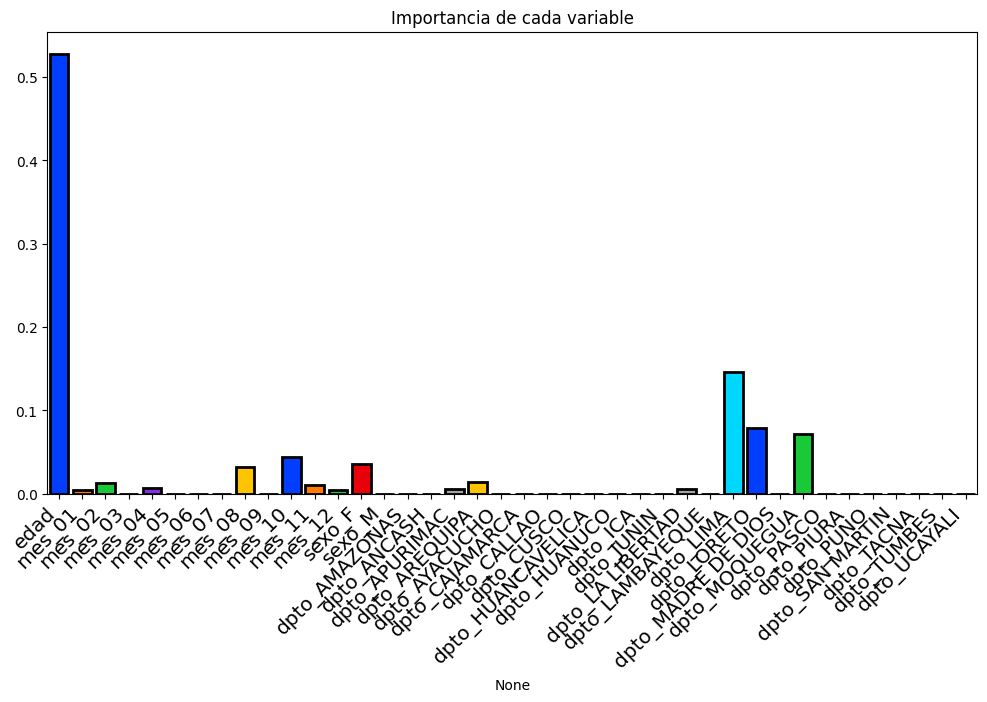

In [65]:
importances = tree.feature_importances_
columns = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada variable')
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")
plt.show()